In [203]:
import warnings
warnings.filterwarnings('ignore')

## Customer Churn prediction example : 

In [204]:
df = pd.read_csv("churn_logistic (1).csv")

<IPython.core.display.Javascript object>

In [205]:
df.drop(["State","Area Code","Phone","Intl Mins","Intl Charge","Intl Plan","VMail Plan","Day Calls","Night Mins","Night Charge","Account Length","Eve Calls","Night Calls"],axis=1,inplace=True)

In [206]:
df

,VMail Message,Day Mins,Eve Mins,CustServ Calls,Day Charge,Eve Charge,Intl Calls,Churn
0,25,265.1,197.4,1,45.07,16.78,3,0
1,26,161.6,195.5,1,27.47,16.62,3,0
2,0,243.4,121.2,0,41.38,10.30,5,0
3,0,299.4,61.9,2,50.90,5.26,7,0
4,0,166.7,148.3,3,28.34,12.61,3,0
...,...,...,...,...,...,...,...,...
5695,0,171.5,160.0,1,29.16,13.60,2,1
5696,0,131.6,179.3,1,22.37,15.24,3,1
5697,0,291.2,234.2,1,49.50,19.91,3,1
5698,0,113.3,197.9,4,19.26,16.82,2,1


In [207]:
X = df.drop(["Churn"],axis = 1)

In [208]:
cols = X.columns

In [209]:
y = df["Churn"]

In [210]:
y.value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
model = LogisticRegression(C = 1000)

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
StandardScaler = StandardScaler()
X = StandardScaler.fit_transform(X)

In [216]:
X_train , X_test, y_train , y_test = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=5)

In [217]:
model.fit(X_train,y_train)

LogisticRegression(C=1000)

In [218]:
from sklearn.metrics import recall_score,precision_score,f1_score,precision_recall_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [219]:
confusion_matrix(y_test,model.predict(X_test))

array([[392, 160],
       [178, 410]], dtype=int64)

In [220]:
confusion_matrix(y_train,model.predict(X_train))

array([[1663,  635],
       [ 666, 1596]], dtype=int64)

In [221]:
cm = confusion_matrix(y_test,model.predict(X_test))
cm

array([[392, 160],
       [178, 410]], dtype=int64)

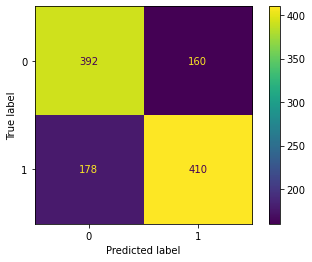

In [222]:
ConfusionMatrixDisplay(cm).plot()

In [223]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.7146929824561403, 0.7035087719298245)

In [224]:
TP = cm[1][1]
TN = cm[0][0]

In [225]:
FP = cm[0][1]
FN =  cm[1][0]

In [226]:
acc = (TP + TN) /(TP+TN+FP+FN)

In [227]:
acc

0.7035087719298245

In [228]:
recall_score(y_test,model.predict(X_test))

0.6972789115646258

In [229]:
precision_score(y_test,model.predict(X_test))

0.7192982456140351

In [230]:
f1_score(y_test,model.predict(X_test))

0.7081174438687392

In [231]:
model.coef_

array([[-0.25982607,  0.37190708,  0.12675763,  0.76939735,  0.3718793 ,
         0.12663576, -0.16998068]])

In [232]:
len(cols)

7

<IPython.core.display.Javascript object>

<AxesSubplot:>

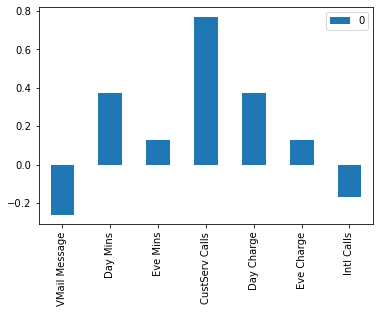

In [233]:
pd.DataFrame(data = model.coef_,columns = cols).T.plot(kind="bar")

In [234]:
y_pred = model.predict_proba(X_test)

In [235]:
y_test

569     1
3458    1
3491    1
5124    1
4874    1
       ..
589     0
3620    1
481     0
1645    0
4438    1
Name: Churn, Length: 1140, dtype: int64

In [236]:
probabilities = y_pred[:,1]

In [237]:
probabilities # 0.5 threshold 

array([0.55825052, 0.73948257, 0.65938542, ..., 0.32158678, 0.82331112,
       0.6286494 ])

In [238]:
probabilities

array([0.55825052, 0.73948257, 0.65938542, ..., 0.32158678, 0.82331112,
       0.6286494 ])

## Receiver operating characteristic 
    AU-ROC : area under the ROC :  
    
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

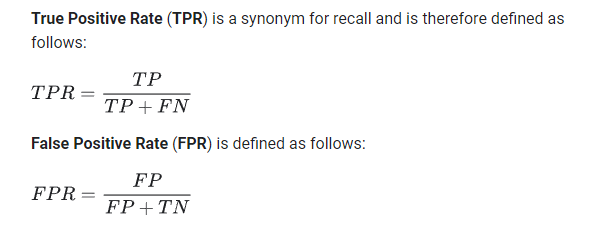
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

ROC Curve showing TP Rate vs. FP Rate at different classification thresholds.


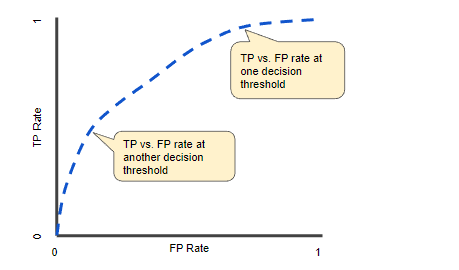

In [239]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay,roc_curve

In [240]:
roc_auc_score(y_test,probabilities)

0.7502002612639258

In [241]:
# ideal model is when TPR is 1 and FPR is 0 

In [242]:
fpr,tpr,threshold = roc_curve(y_test, probabilities)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

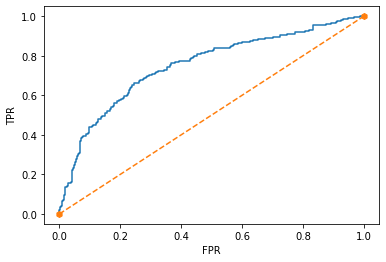

In [243]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot([0,1],[0,1],"h--")
plt.show()

In [244]:
# roc-auc is impacted by imbalanced data . 
# random model has AUC of 0.5
   # it doent depends on y^ values . 
        #rahter it depends on the order of probability.
        
        


In [ ]:
# for imbalanced data : prefer PR curve, precisison , recall , f1 score 


In [249]:
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support,auc

In [247]:
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

<IPython.core.display.Javascript object>

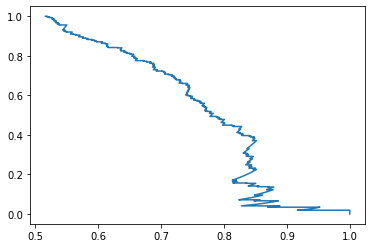

In [248]:
plt.plot(precision,recall)

In [251]:
auc(recall,precision)

0.7575126880529139

In [259]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


In [260]:
evaluate(model,X_train,X_test,y_train,y_test)

TRAINIG RESULTS: 


<IPython.core.display.Javascript object>

CONFUSION MATRIX:
[[1663  635]
 [ 666 1596]]
ACCURACY SCORE:
0.7147
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.714040     0.715374  0.714693     0.714707      0.714702
recall        0.723673     0.705570  0.714693     0.714622      0.714693
f1-score      0.718824     0.710438  0.714693     0.714631      0.714664
support    2298.000000  2262.000000  0.714693  4560.000000   4560.000000
TESTING RESULTS: 


<IPython.core.display.Javascript object>

CONFUSION MATRIX:
[[392 160]
 [178 410]]
ACCURACY SCORE:
0.7035
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.687719    0.719298  0.703509     0.703509      0.704007
recall       0.710145    0.697279  0.703509     0.703712      0.703509
f1-score     0.698752    0.708117  0.703509     0.703435      0.703583
support    552.000000  588.000000  0.703509  1140.000000   1140.000000


In [261]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

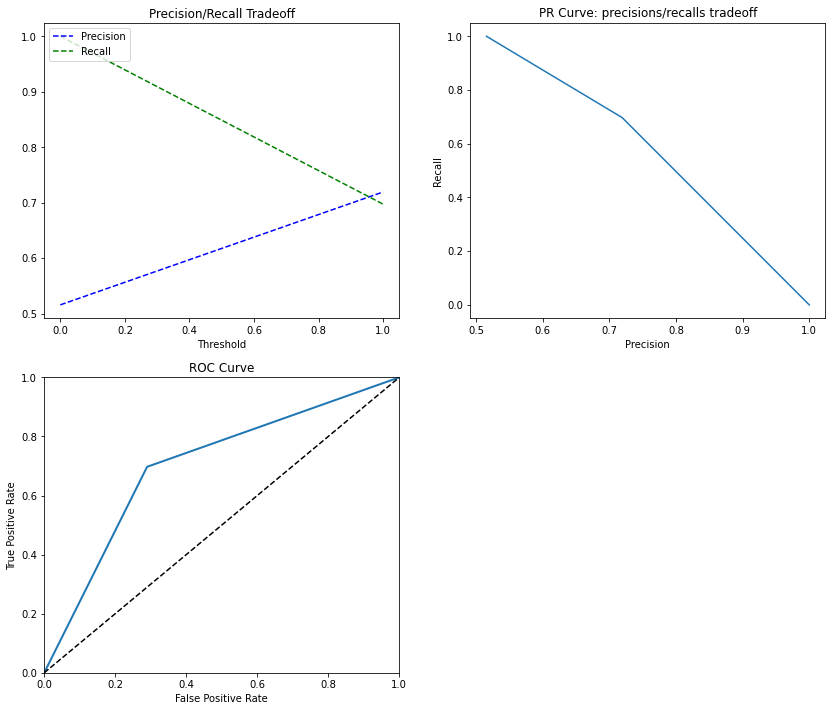

In [264]:
precisions, recalls, thresholds = precision_recall_curve(y_test, model.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plot_roc_curve(fpr, tpr)

https://medium.com/@sayahfares19/machine-learning-project-in-python-step-by-step-predicting-employee-attrition-eef6afc0959b